In [19]:
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from pytesseract import Output
import pytesseract as ts
import cv2
from reader import *

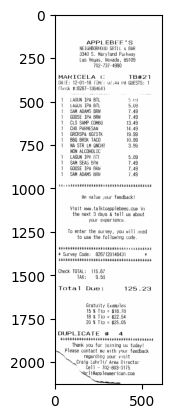

In [2]:
filename = 'PNG_data/test.png'
img1 = np.array(Image.open(filename))
fig_size = plt.rcParams["figure.figsize"]
plt.imshow(img1)
plt.show()

In [34]:
text = ts.image_to_string(img1)
print(text)

APPLEBEE’S

NEIGHBORHODD GRTLL & BAR

3340 S. Maryland Parkway

Las Vegas, Nevada, 89109

702-737-4990

MARICELA TB#21
DAYE: 12-01-18 TINI: u/:44 i GUESTS: 1
Mlieck #:8267-1364643

1 LAGUN IPA BTL

[l’
LAGUK IPA BTL 5.09
| SAM ADAMS BRW 7.49
GOOSE IPA BRH 7.49
1 CLS SAMP COMBO 13.49
1 CHX PARMESAN 14.49
1 GRCRSP& 60ZSTK 19.99
1 BBO BRSK TACO 10.99
NA STR LM GNCHR 3.99

NON ALCOHOLIC
LAGUN IPA 7! 5.09
SAM SEAS ERW 7.49
GOOSE IPA BRYE 7.48
SAM ADAMS BRY .49

Fha b RERARKER KRKKRRE SRR AR R R R Ak
We value your feedback!

Visit www.talktoapplebees.com in
the next 3 days & tell us about
YOur experience.

To enter the survey, you will need
to use the following code.

KRR R R KRR RRRRO AR LR bR KR b K
* Survey Code: 8267120146431 *
FRRROROOE R K KRR R KK A Rk

Check TOTAL: 115.67
TAX:  9.55

Total Due: 125 .23

Gratuity Examples
15 % Tip = $16.78
18 % Tip = $22.54
20 % Tip = $25.05

DUPLICATE # 4
FRERERRERR R KRR KRR R R FRbk kR R
Thank you for joining us today!
> Please contact me with your

In [26]:
results = ts.image_to_data(img1, 
output_type=Output.DICT)
df = pd.DataFrame(data= results)
df=df[df['text'].apply(isprice)]
df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
165,5,1,14,1,4,3,211,1447,54,13,78,115.67
173,5,1,14,2,1,2,233,1501,52,23,88,9.53
190,5,1,17,1,2,4,482,1568,66,23,9,.23
237,5,1,23,1,1,3,408,2060,47,18,79,.com


In [22]:
products_blocks = []
for _,row in df.iterrows():
    if isprice(row.text) and row.block_num not in products_blocks:
        products_blocks.append(row.block_num)
df = df[df['block_num'].isin(products_blocks)]
df.groupby(['block_num', 'line_num'], group_keys=True).text.sum()


block_num  line_num
14         1           FEERMFREREARRkM0£FRRERRRETAX:9.53
           2                                     8Cadel*
           3                    BRRERRRRRREHRRR§RORRARkR
           4                           CheckTOTAL:115.67
           5                           ChecK[OTALZ[T5.67
17         1                                        Due:
           2                            TotalOouel125.23
23         1                      kel1@app1eamerican.com
Name: text, dtype: object

In [6]:
img1 = np.copy(image)
img1 = np.array(Image.open(filename))
for i in range(0, len(results['text'])):
   x = results['left'][i]
   y = resu1lts["top"][i]

   w = results["width"][i]
   h = results["height"][i]

   text = results["text"][i] 
   conf = int(results["conf"][i])

   if conf > 70:
        text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
        if isprice(text) :
           cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 255, 0), 2)
        else :
           cv2.rectangle(img1, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(img1, text, (x, y - 10), 
cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 2)
plt.imshow(img1)
plt.show()


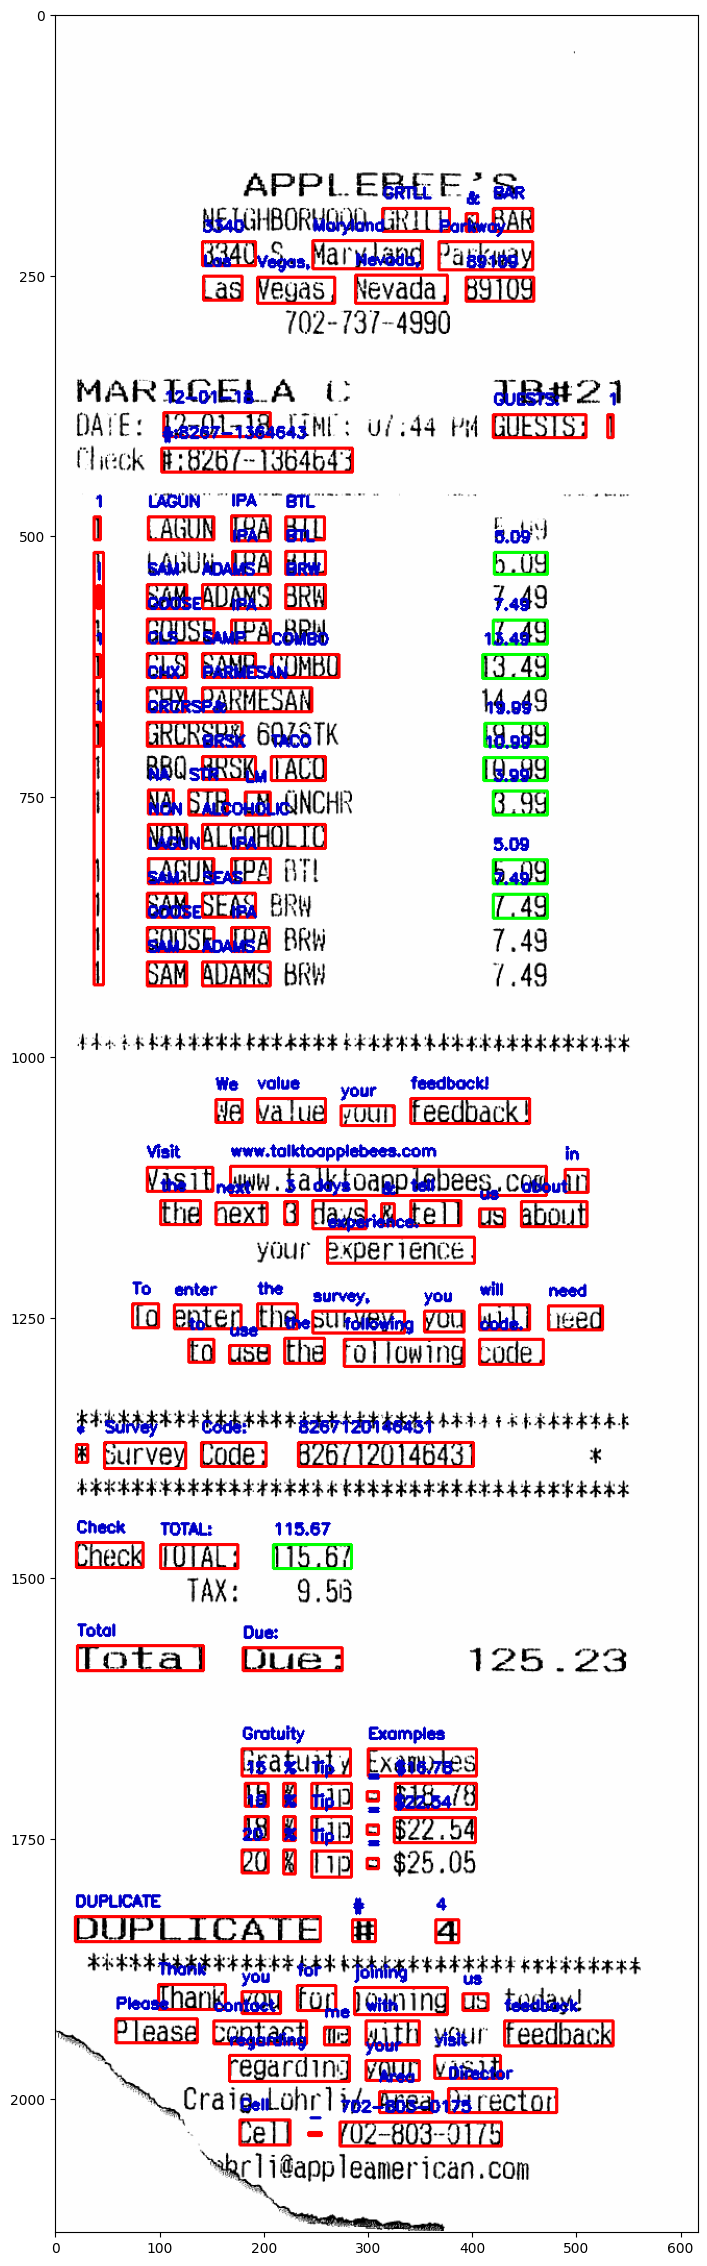

In [7]:
plt.rcParams["figure.figsize"] = [  6* x for x in fig_size]
plt.imshow(img1)
plt.show()